In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ecdbc1345549c53f73c142a34337b7cd


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
# Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | shimoda
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | buala
Processing Record 6 of Set 1 | khonuu
City not found. Skipping...
Processing Record 7 of Set 1 | puqi
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | wewak
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mayo
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | zhicheng
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | stornoway
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | menzelinsk
Processing Record 22 of Set 1 | alappuzha
Processi

Processing Record 37 of Set 4 | katherine
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | lutkun
Processing Record 41 of Set 4 | mitzic
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | port augusta
Processing Record 44 of Set 4 | verkhoyansk
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | khorixas
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | tres arroyos
Processing Record 49 of Set 4 | chagda
City not found. Skipping...
Processing Record 50 of Set 4 | dunnville
Processing Record 1 of Set 5 | nanakuli
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | strelka
Processing Record 4 of Set 5 | matara
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | baoshan
Processing Record 7 of Set 5 | viedma
Processing Record 8 of Set 5 | menongue
Processing Record 9 of Set 5 | pevek
Processi

Processing Record 27 of Set 8 | san carlos de bariloche
Processing Record 28 of Set 8 | turukhansk
Processing Record 29 of Set 8 | dakar
Processing Record 30 of Set 8 | tiarei
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | aurillac
Processing Record 33 of Set 8 | calabozo
Processing Record 34 of Set 8 | quebrada larga
Processing Record 35 of Set 8 | solnechnyy
Processing Record 36 of Set 8 | belmonte
Processing Record 37 of Set 8 | paracuru
Processing Record 38 of Set 8 | tigil
Processing Record 39 of Set 8 | rudersdorf
Processing Record 40 of Set 8 | paamiut
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | belgrade
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | bokspits
City not found. Skipping...
Processing Record 46 of Set 8 | west lafayette
Processing Record 47 of Set 8 | sao raimundo nonato
Processing Record 48 of Set 8 | sri aman
Proc

Processing Record 14 of Set 12 | miri
Processing Record 15 of Set 12 | mahibadhoo
Processing Record 16 of Set 12 | jaipur hat
City not found. Skipping...
Processing Record 17 of Set 12 | ust-kuyga
Processing Record 18 of Set 12 | sitka
Processing Record 19 of Set 12 | saryg-sep
Processing Record 20 of Set 12 | vostok
Processing Record 21 of Set 12 | horqueta
Processing Record 22 of Set 12 | goderich
Processing Record 23 of Set 12 | king city
Processing Record 24 of Set 12 | agua prieta
Processing Record 25 of Set 12 | marsh harbour
Processing Record 26 of Set 12 | arlit
Processing Record 27 of Set 12 | znamenskoye
Processing Record 28 of Set 12 | valdivia
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | san quintin
Processing Record 31 of Set 12 | tigre
Processing Record 32 of Set 12 | el balyana
City not found. Skipping...
Processing Record 33 of Set 12 | altay
Processing Record 34 of Set 12 | tukrah
Processing Record 35 of Set 12 | moa
Processing Record 36 

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,69.80,73,75,17.22,TO,2020-09-13 05:42:51
1,Tasiilaq,65.61,-37.64,33.80,80,99,2.84,GL,2020-09-13 05:42:52
2,Shimoda,34.67,138.95,86.00,74,20,14.99,JP,2020-09-13 05:42:53
3,Hilo,19.73,-155.09,77.00,69,1,4.70,US,2020-09-13 05:42:53
4,Buala,-8.14,159.59,84.11,72,23,5.84,SB,2020-09-13 05:42:53
5,Puqi,29.72,113.88,72.88,84,100,4.81,CN,2020-09-13 05:42:54
6,Albany,42.60,-73.97,57.99,100,18,8.03,US,2020-09-13 05:42:37
7,Hofn,64.25,-15.21,43.25,64,0,12.35,IS,2020-09-13 05:42:55
8,Wewak,-3.55,143.63,84.56,73,16,11.41,PG,2020-09-13 05:42:56
9,Alofi,-19.06,-169.92,73.40,73,19,13.87,NU,2020-09-13 05:42:36


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()

In [28]:
today = time.strftime("%x")
today

'09/12/20'

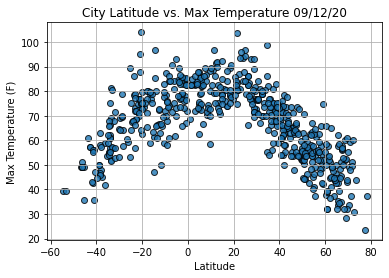

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

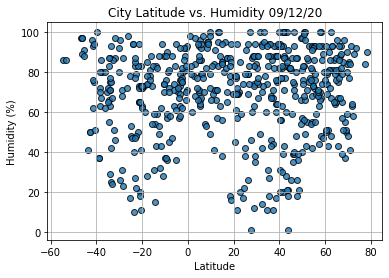

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

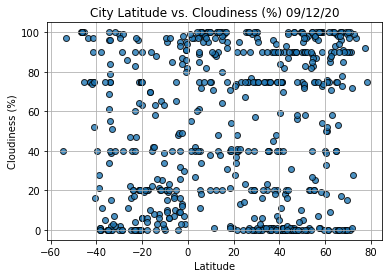

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

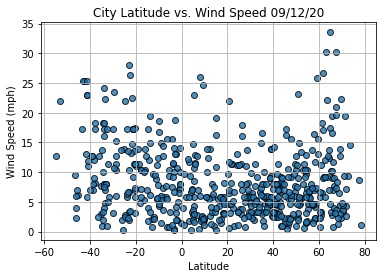

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [62]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [64]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
   
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
index13 = city_data_df.loc[13]

In [66]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
570     True
571     True
572     True
573     True
574     True
Name: Lat, Length: 575, dtype: bool

In [67]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Tasiilaq,65.61,-37.64,33.80,80,99,2.84,GL,2020-09-13 05:42:52
2,Shimoda,34.67,138.95,86.00,74,20,14.99,JP,2020-09-13 05:42:53
3,Hilo,19.73,-155.09,77.00,69,1,4.70,US,2020-09-13 05:42:53
5,Puqi,29.72,113.88,72.88,84,100,4.81,CN,2020-09-13 05:42:54
6,Albany,42.60,-73.97,57.99,100,18,8.03,US,2020-09-13 05:42:37
...,...,...,...,...,...,...,...,...,...
570,Taoudenni,22.68,-3.98,93.52,20,41,5.21,ML,2020-09-13 05:47:46
571,Yumen,40.28,97.20,69.12,20,59,14.32,CN,2020-09-13 05:47:46
572,Kungurtug,50.60,97.52,44.26,68,97,4.70,RU,2020-09-13 05:47:47
573,Meadow Lake,34.80,-106.54,64.40,31,40,6.24,US,2020-09-13 05:47:47


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

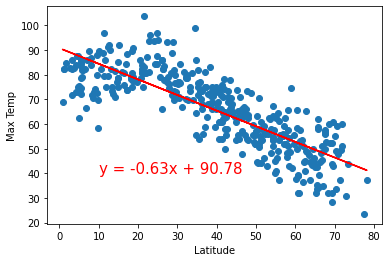

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,40))

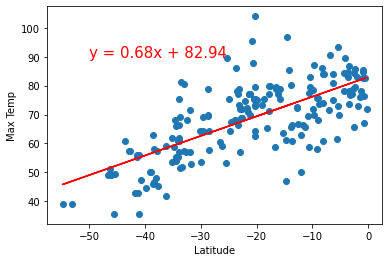

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

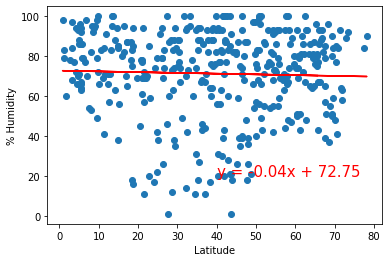

In [74]:
# Linear Regression on the Percent Humidity for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

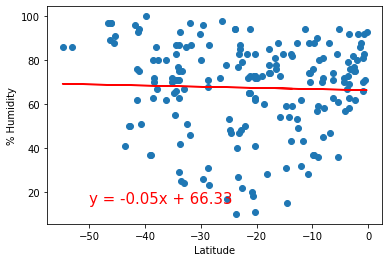

In [76]:
# Linear Regression on the Percent Humidity for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-50,15))

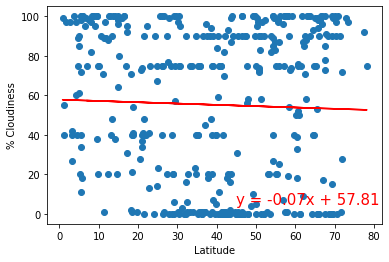

In [77]:
# Skill Drill
# Linear Regression on the Percent Cloudiness for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

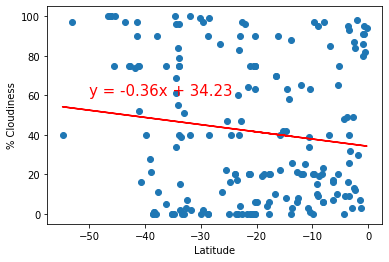

In [82]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,60))

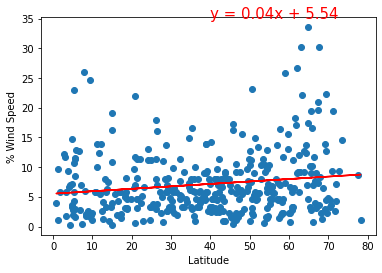

In [85]:
# Linear regression on the Wind Speed of the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(40,35))

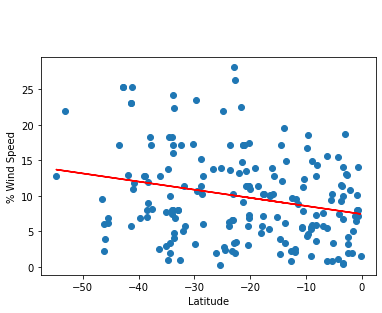

In [86]:
# Linear Regression on the Wind Speed of the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,35))